# Lets Understand some of the most Interesting Patterns of Funding and Startups.

* **How Does the Funding Ecosystem changes with respect to Time?**
* **What is the General Amount that Startups get in India?**
* **Which Kind of Industries are more preferred for Startups?**
* **Does Location also play a role, In determining the Growth of a Startup?**
* **Who plays the main role in Indian Startups Ecosystem?**
* **What are the different Types of Funding for Startups?**

In [1]:
# for mathematical operations
import numpy as np 

# for dataframe operations
import pandas as pd 

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# lets select  a background style
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 7)

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

In [2]:
# lets import the data
data = pd.read_csv("startup_funding.csv")

In [3]:
data

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...,...
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [4]:
data = data.rename(columns={'Sr No': 'S/No', 'Date dd/mm/yyyy': 'Date', 'City Location' :'City'})

In [5]:
data.head()

,S/No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [6]:
# lets check the column names of the data
data.columns

Index(['S/No', 'Date', 'Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD',
       'Remarks'],
      dtype='object')

In [7]:
# lets check the shape of the data
print("Size of data", data.shape)

Size of data (3044, 10)


### Data Cleaning

In [8]:
# missing data 

# lets import warnings module
import warnings
warnings.filterwarnings('ignore')

# lets calculate the total missing values in the data
total = data.isna().sum().sort_values(ascending = False)

# lets calculate the percentage of missing values in the data
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)

# lets store the above two values in a dataset called missing data
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])

# lets check the head of the data
missing_data

,Total,Percent %
Remarks,2625,86.235217
Amount in USD,960,31.537451
SubVertical,936,30.749014
City Location,180,5.913272
Industry Vertical,171,5.617608
Investors Name,24,0.788436
InvestmentnType,4,0.131406
S/No,0,0.000000
Date,0,0.000000
Startup Name,0,0.000000


In [9]:
# lets check the values in the Remarks column
data['Remarks'].value_counts()

Series A                             175
Series B                              63
Pre-Series A                          37
Series C                              28
Series D                              11
                                    ... 
Pre Series-A                           1
QPrize Contest Winners                 1
pre-series A                           1
Personal Investment                    1
Strategic Funding, Minority stake      1
Name: Remarks, Length: 72, dtype: int64

In [10]:
#Lets remove the remark column as it contains a lot of nans, and high cardinal columns

data = data.drop(['Remarks'], axis = 1)

#Lets check the number of columns left
data.columns

Index(['S/No', 'Date', 'Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD'],
      dtype='object')

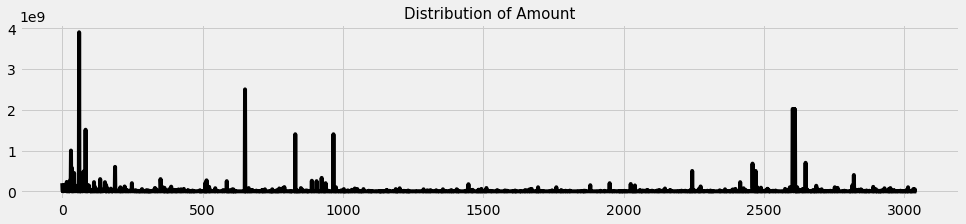

In [11]:
# lets convert the amount column into numerical, so that we can analyze the values inside it

# function to clean the AmounInUsd Column
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '':
        x = '-999'
    return x

# lets apply the function on the column
data["Amount in USD"] = data["Amount in USD"].apply(lambda x: float(clean_amount(x)))

# lets check the head of the column after cleaning it
plt.rcParams['figure.figsize'] = (15, 3)
data['Amount in USD'].plot(kind = 'line', color = 'black')
plt.title('Distribution of Amount', fontsize = 15)
plt.show()

## How Does the Funding Ecosystem changes with respect to Time?

In [12]:
## Cleaning the dates

data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'
data['Date'][data['Date']=='13/04.2015'] = '13/04/2015'
data['Date'][data['Date']=='15/01.2015'] = '15/01/2015'
data['Date'][data['Date']=='22/01//2015'] = '22/01/2015'
data['Date'][data['Date']=='05/072018'] = '05/07/2018'
data['Date'][data['Date']=='01/07/015'] = '01/07/2015'
data['Date'][data['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

Number of funding per month in decreasing order(Top 10)
 201601    104
201602    100
201507     98
201606     98
201508     98
201510     93
201511     92
201512     89
201509     88
201608     87
Name: yearmonth, dtype: int64


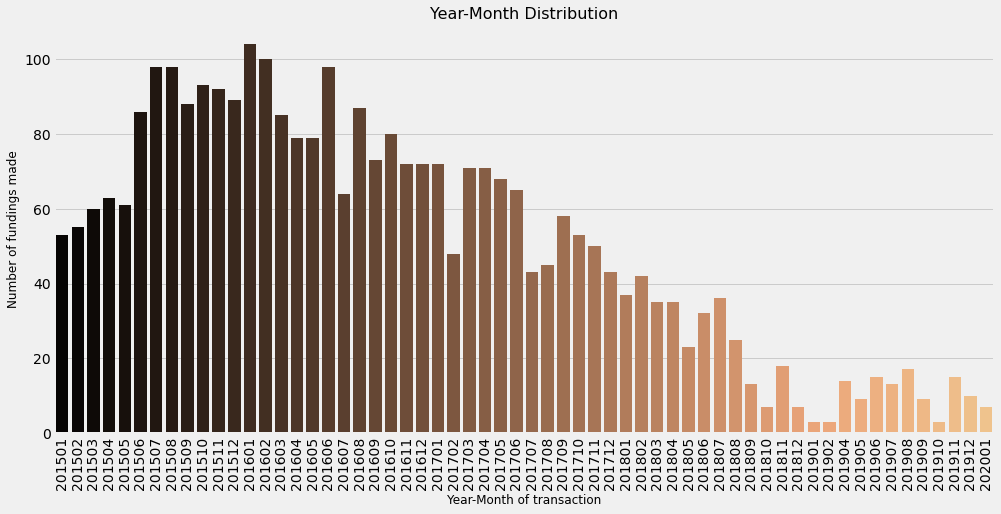

In [13]:
# some of the date formats are written wrongly so we have to clean them thoroughly so that we can analyze these values

# converting them into a Datetime object
data["yearmonth"] = (pd.to_datetime(data['Date'],
         format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(data['Date'],format='%d/%m/%Y').dt.month)


temp = data['yearmonth'].value_counts().sort_values(ascending = False).head(10)
print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = data['yearmonth'].value_counts()

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(year_month.index, year_month.values, palette = 'copper')
plt.xticks(rotation = 90)
plt.xlabel('Year-Month of transaction', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

## What is the General Amount that Startups get in India?

In [14]:
# lets check the Maximum funding of a startup
print("Maximum funding to a Startups is : ", data["Amount in USD"].dropna().sort_values().max())

Maximum funding to a Startups is :  3900000000.0


In [15]:
# lets check the startups with more than 50crore+ funding

@interact
def check(column = 'Amount in USD', x = 500000000): # 50 crore funding of startups
    return data[data[column] > x].sort_values(by = 'Amount in USD', ascending = False)

interactive(children=(Text(value='Amount in USD', description='column'), IntSlider(value=500000000, descriptio…

In [16]:
# lets check out different ventures of Paytm
data[data['Startup Name'] == 'Paytm']

,S/No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,yearmonth
31,32,25/11/2019,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,201911
251,252,26/06/2018,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06,201806
830,831,18/05/2017,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09,201705
1493,1494,30/08/2016,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,201608
2459,2460,29/09/2015,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08,201509
2890,2891,13/03/2015,Paytm,NaN,NaN,NaN,Ratan Tata,Private Equity,-9.990000e+02,201503
2948,2949,05/02/2015,Paytm,NaN,NaN,NaN,Ant Financial Services (Alipay),Private Equity,-9.990000e+02,201502


In [17]:
# lets check out different ventures of Flipkart
data[data['Startup Name'] == 'Flipkart']

,S/No,Date,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,yearmonth
651,652,11/08/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09,201708
773,774,26/06/2017,Flipkart,eCommerce,Online marketplace,Bangalore,Naspers,Private Equity,7.100000e+07,201706
966,967,21/03/2017,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09,201703
1032,1033,20/02/2017,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,3.870000e+07,201702
2689,2690,04/06/2015,Flipkart,eCommerce platform,NaN,Bangalore,Morgan Stanley,Private Equity,5.000000e+07,201506


In [18]:
# lets check the minimum funding in a startup
print("Minimum funding to a Startups is : ", data["Amount in USD"].dropna().sort_values().min())

Minimum funding to a Startups is :  -999.0


In [19]:
# lets check the startups with least funding
data[['Amount in USD','Startup Name']].sort_values(by = 'Amount in USD', ascending = True).head(5)

,Amount in USD,Startup Name
603,-999.0,Gurukul
745,-999.0,HyperTrack
2155,-999.0,Intelligent Interfaces
747,-999.0,Digit
1485,-999.0,CrownIt


In [20]:
data[data['Amount in USD'] == -999.0].shape

(967, 10)

In [21]:
# Average Funding
print("On Average indian startups got funding of : ", data["Amount in USD"].dropna().sort_values().mean())

On Average indian startups got funding of :  15977024.120565046


Total startups funded :  2459
Ola Cabs     8
Swiggy       8
Paytm        7
Meesho       6
Nykaa        6
NoBroker     6
Medinfi      6
UrbanClap    6
Flipkart     5
Grofers      5
Name: Startup Name, dtype: int64


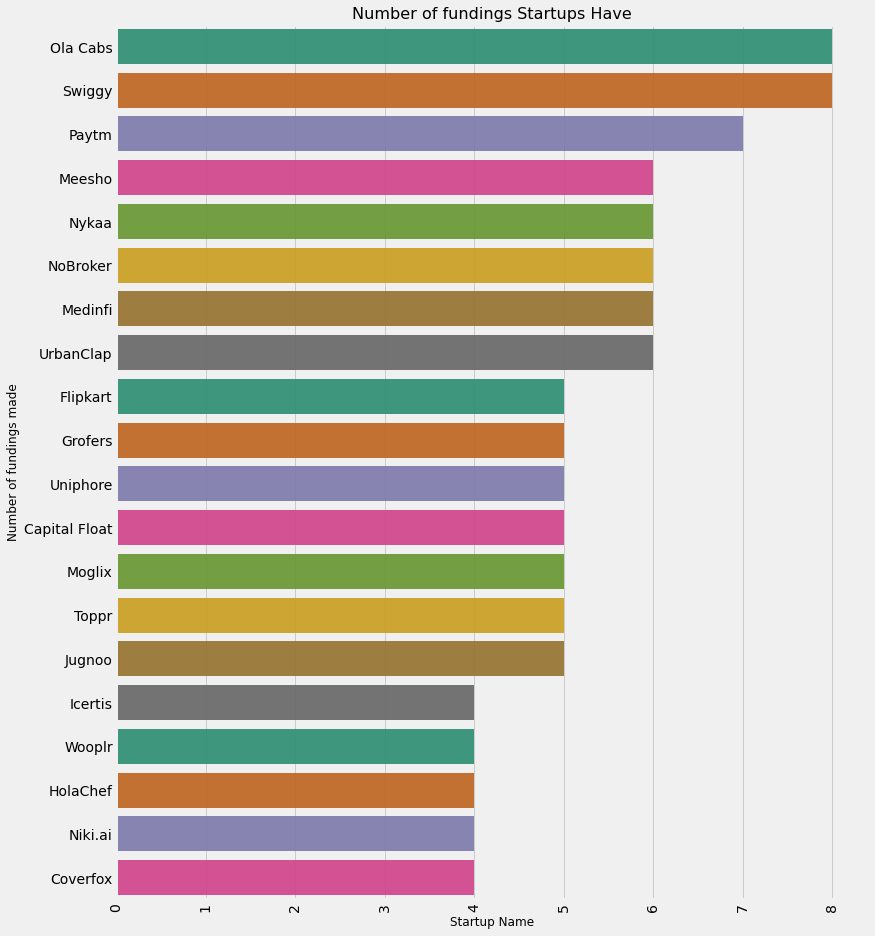

In [22]:
# lets check the no. of funding each startsup got

print("Total startups funded : ", len(data["Startup Name"].unique()))
print(data["Startup Name"].value_counts().head(10))
startupname = data['Startup Name'].value_counts().head(20)

# lets plot the data
plt.rcParams['figure.figsize'] = (12, 15)
sns.barplot(y = startupname.index, x = startupname.values, alpha=0.9, palette = 'Dark2')
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings Startups Have", fontsize=16)
plt.show()

## Which Kind of Industries are more preferred for Startups?

Consumer Internet    941
Technology           478
eCommerce            186
Healthcare            70
Finance               62
ECommerce             61
Logistics             32
E-Commerce            29
Education             24
Food & Beverage       23
Name: Industry Vertical, dtype: int64


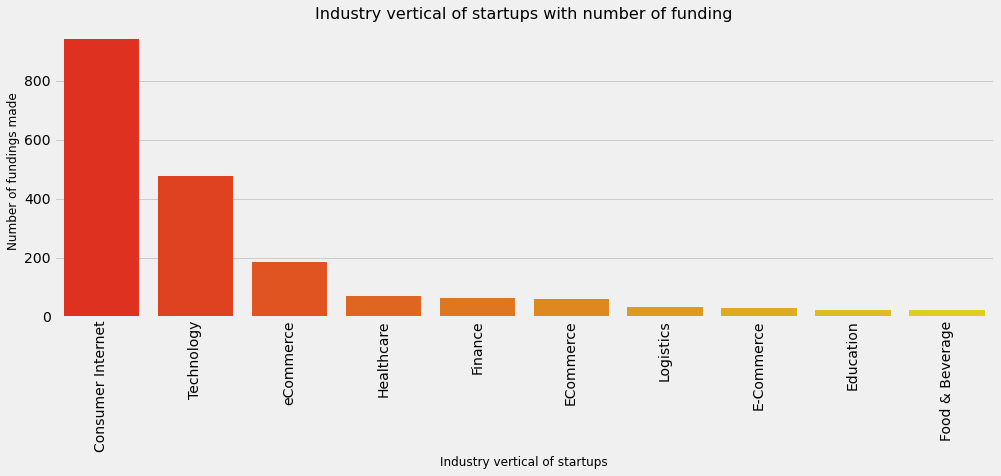

In [23]:
# lets analyze the Industry of the Startups

# data cleaning
data['Industry Vertical'] = data['Industry Vertical'].replace('nan', 'Consumer Technology')

industry = data['Industry Vertical'].value_counts().head(10)
print(industry)

# lets plot the data
plt.rcParams['figure.figsize'] = (15, 5)
sns.barplot(industry.index, industry.values, palette = 'autumn')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

Online Pharmacy                                  10
Food Delivery Platform                            8
Online Education Platform                         5
Education                                         5
Online lending platform                           5
Online Learning Platform                          5
Online Lending                                    5
Non-Banking Financial Company                     4
Online Food Delivery                              4
B2B Marketplace                                   3
Online Insurance Platform                         3
Agri-tech                                         3
SaaS                                              3
Online Insurance Aggregator                       3
Online platform for Higher Education Services     3
ECommerce Marketplace                             3
Online Gifting platform                           3
Online Marketplace                                3
Data Analytics platform                           3
Online Furni

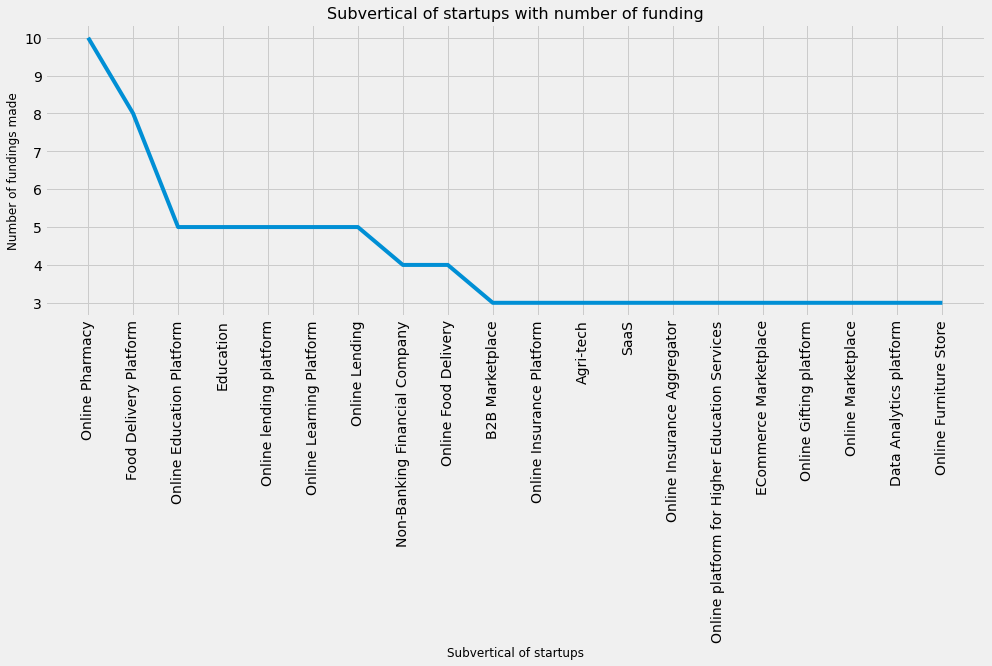

In [24]:
# lets analyze the sub vertical industries

industry = data['SubVertical'].value_counts()[1:].head(20)
print(industry)

# lets plot the data
sns.lineplot(industry.index, industry.values, palette = 'winter')
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

## Does Location also play a role, In determining the Growth of a Startup?

Bangalore    841
Mumbai       567
New Delhi    421
Gurgaon      287
Pune         105
Hyderabad     99
Chennai       97
Noida         92
Gurugram      50
Ahmedabad     38
Name: City  Location, dtype: int64


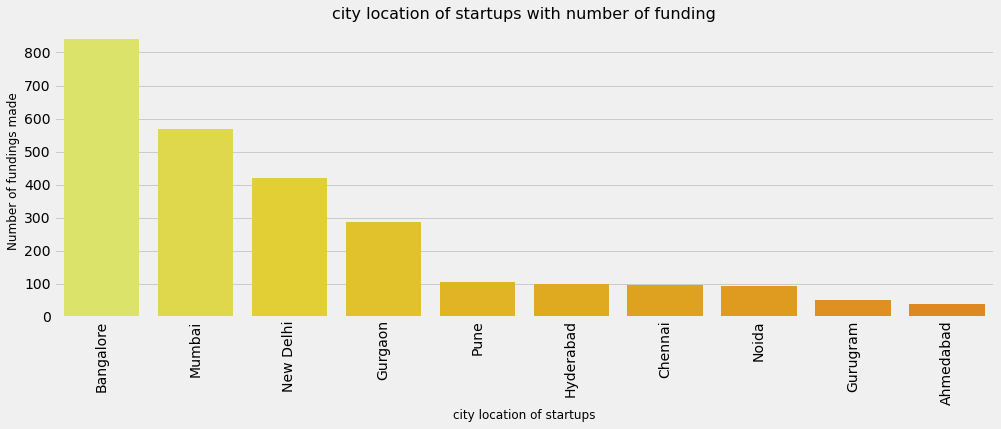

In [25]:
# analyzing the effect of Cities on a Startup

# lets clean the data for better analysis
data['City  Location'] = data['City  Location'].replace(('Bengaluru', 'nan'),('Bangalore', 'Bangalore'))

city = data['City  Location'].value_counts().head(10)
print(city)

# lets plot the data
sns.barplot(city.index, city.values, palette = 'Wistia')
plt.xticks(rotation='vertical')
plt.xlabel('city location of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("city location of startups with number of funding", fontsize=16)
plt.show()

In [26]:
data.columns

Index(['S/No', 'Date', 'Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD',
       'yearmonth'],
      dtype='object')

## Who plays the main role in Indian Startups Ecosystem?

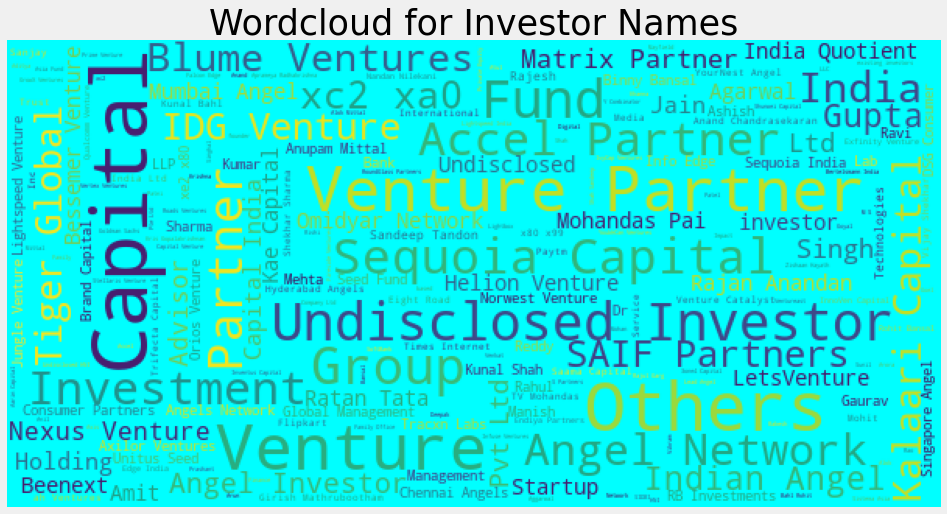

In [30]:
from wordcloud import WordCloud

names = data["Investors Name"][~pd.isnull(data["Investors Name"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300, background_color = 'cyan').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

Undisclosed Investors       112
Ratan Tata                   25
Indian Angel Network         23
Kalaari Capital              16
Group of Angel Investors     15
Sequoia Capital              15
Accel Partners               12
Brand Capital                11
Venture Catalysts            11
SAIF Partners                10
Name: Investors Name, dtype: int64


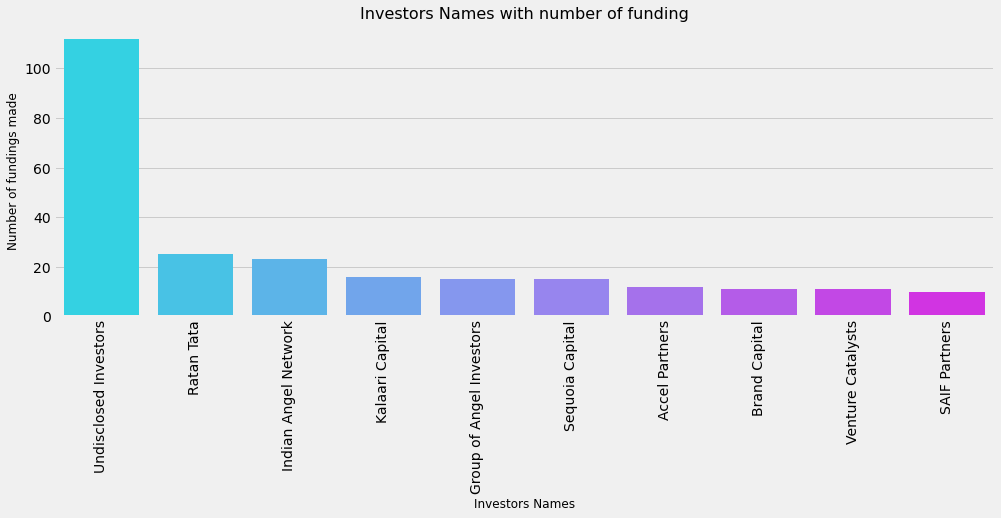

In [32]:
# lets analyze the investors on startups

# lets clean the dataset
data['Investors Name'][data['Investors Name'] == 'Undisclosed investors'] = 'Undisclosed Investors'
data['Investors Name'][data['Investors Name'] == 'undisclosed Investors'] = 'Undisclosed Investors'
data['Investors Name'][data['Investors Name'] == 'undisclosed investors'] = 'Undisclosed Investors'
data['Investors Name'][data['Investors Name'] == 'Undisclosed investor'] = 'Undisclosed Investors'
data['Investors Name'][data['Investors Name'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
data['Investors Name'][data['Investors Name'] == 'Undisclosed'] = 'Undisclosed Investors'
data['Investors Name'][data['Investors Name'] == 'nan'] = 'Undisclosed Investors'

# lets check the value counts
investors = data['Investors Name'].value_counts().head(10)
print(investors)

# lets plot the data
sns.barplot(investors.index, investors.values, palette = 'cool')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show() 

## What are the different Types of Funding for Startups?


Private Equity          1356
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Name: InvestmentnType, dtype: int64


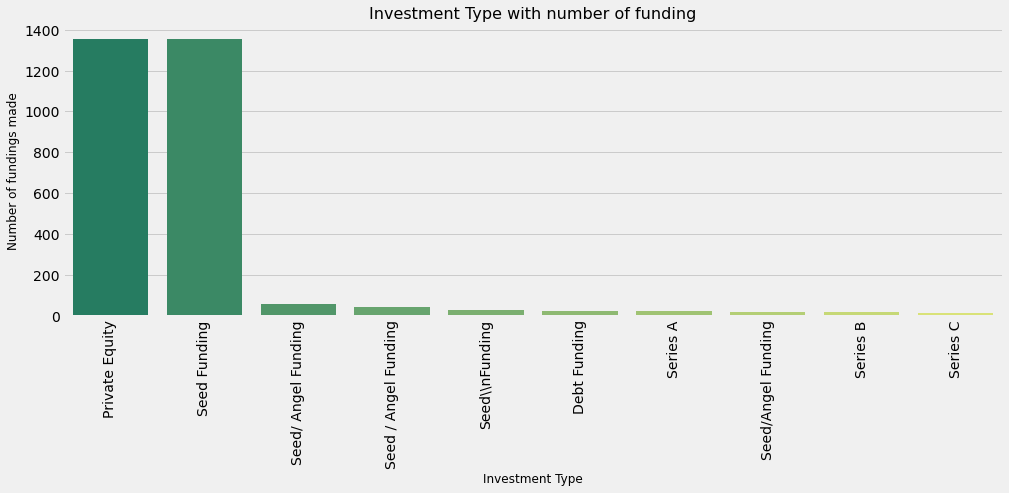

In [35]:
# lets analyze the investment
investment = data['InvestmentnType'].value_counts().head(10)
print(investment)

# lets clean the dataset
data['InvestmentnType'][data['InvestmentnType'] == 'SeedFunding'] = 'Seed Funding'
data['InvestmentnType'][data['InvestmentnType'] == 'Crowd funding'] = 'Crowd Funding'
data['InvestmentnType'][data['InvestmentnType'] == 'PrivateEquity'] = 'Private Equity'

# lets plot the data
sns.barplot(investment.index, investment.values, palette = 'summer')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()

# Thank You !!!